# TALLER 1 - CIENCIA DE DATOS APLICADA

El objetivo de este taller es evaluar las capacidades del estudiante para realizar análisis de
datos utilizando técnicas estadísticas y de visualización, que le permitan entender un
conjunto de datos, descubrir insights y sugerir accionables al negocio


## Contexto de negocio

La industria hotelera enfrenta grandes retos para optimizar la ocupación y reducir las cancelaciones de reservas, especialmente en un entorno de alta competencia y variabilidad en la demanda. Este análisis busca explorar el dataset de reservas hoteleras con el fin de comprender patrones de comportamiento en los clientes, descubrir factores que influyen en la duración de la estadía y en la probabilidad de cancelación, y finalmente proponer estrategias basadas en datos que apoyen la toma de decisiones para mejorar la rentabilidad y eficiencia de la cadena hotelera.


In [ ]:
# Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("muted")

In [7]:
# Datos
df = pd.read_csv("C:/Users/wired/Downloads/Taller1_DataScience/data/hotel_bookings_modified.csv")

C:\Users\wired\AppData\Local\Temp\ipykernel_25516\3026260986.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/wired/Downloads/Taller1_DataScience/data/hotel_bookings_modified.csv")


# Entendimiento de Datos

In [8]:
# Dimensiones y primeras filas
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (58895, 33)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.0,July,27,1,0,1,1,...,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.0,July,27,1,0,1,1,...,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,...,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,NaN


In [9]:
# Tipos de datos, nulos y columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58895 entries, 0 to 58894
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           58895 non-null  object 
 1   is_canceled                     58895 non-null  int64  
 2   lead_time                       58895 non-null  int64  
 3   arrival_date_year               58307 non-null  float64
 4   arrival_date_month              58895 non-null  object 
 5   arrival_date_week_number        58895 non-null  int64  
 6   arrival_date_day_of_month       58895 non-null  int64  
 7   stays_in_weekend_nights         58895 non-null  int64  
 8   stays_in_week_nights            58895 non-null  int64  
 9   adults                          58895 non-null  int64  
 10  children                        58891 non-null  float64
 11  babies                          58895 non-null  int64  
 12  meal                            

### Calidad de Datos

### Analisis de Completitud

In [11]:
# Conteo de valores nulos por columna

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
completitud = pd.DataFrame({
    "Valores Nulos": missing,
    "% Nulos": missing_percent
}).sort_values(by="% Nulos", ascending=False)

completitud.head(10)


,Valores Nulos,% Nulos
kids,58694,99.658715
company,55416,94.092877
agent,9132,15.505561
reservation_status,589,1.000085
customer_type,589,1.000085
required_car_parking_spaces,589,1.000085
arrival_date_year,588,0.998387
country,478,0.811614
children,4,0.006792
reservation_status_date,1,0.001698


### Decisiones sobre Completitud

A partir del análisis de valores nulos se definieron las siguientes acciones: 

* la variable kids presenta más del 99% de valores faltantes y resulta redundante frente a children y babies, por lo que se unificará la información de niños y bebés en una sola variable y kids será descartada
* la variable company muestra un 94% de datos faltantes y antes de eliminarla se realizará un análisis exploratorio de sus valores no nulos para evaluar si aporta información útil; la variable agent tiene un 15% de nulos y se revisará su distribución para decidir si se imputan los faltantes con una categoría como Unknown o si se mantienen 
* otras columnas como reservation_status, customer_type, required_car_parking_spaces, arrival_date_year, country, children y reservation_status_date presentan menos del 1% de nulos, por lo que podrán imputarse con valores comunes o eliminar esas pocas filas sin que esto afecte el análisis global. Con estas decisiones se procederá a una inspección más detallada de company y agent para definir su tratamiento final.


#### Variable Kids

In [16]:
# Crear una nueva columna con la suma de niños y bebés
df["total_kids"] = df["children"].fillna(0) + df["babies"].fillna(0)

# Eliminar la columna 'kids' 
df = df.drop(columns=["kids"])


#### Variables Company y Agent

In [17]:
# Conteo de valores únicos y top categorías de company y agent
print("Valores únicos en company:", df["company"].nunique())
print(df["company"].value_counts(dropna=True).head(10))

print("\nValores únicos en agent:", df["agent"].nunique())
print(df["agent"].value_counts(dropna=True).head(10))


Valores únicos en company: 277
company
223.0    784
281.0    138
154.0    133
405.0    100
94.0      87
135.0     64
331.0     58
498.0     58
47.0      57
110.0     51
Name: count, dtype: int64

Valores únicos en agent: 249
agent
240.0    13907
9.0       6997
1.0       3184
250.0     2870
241.0     1721
6.0       1378
40.0      1013
314.0      927
242.0      779
37.0       615
Name: count, dtype: int64


* La variable company se eliminará porque presenta más del 90% de valores faltantes y los registros no nulos estaban muy dispersos sin aportar un patrón claro
* agent sí mostró concentración en pocos valores con suficiente representatividad, por lo que se decidió conservarla e imputar sus valores faltantes como Unknown.


In [19]:
# Eliminar company
df = df.drop(columns=["company"])

# Imputar nulos de agent con 'Unknown'
df["agent"] = df["agent"].fillna("Unknown")

# Verificar cambios
print("Columnas actuales:", df.columns.tolist())
print("Nulos en agent:", df["agent"].isnull().sum())


Columnas actuales: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'total_kids']
Nulos en agent: 0


#### Imputacion de nulos para completitud del <1%

In [18]:
# Columnas con muy pocos nulos
cols_bajos_nulos = ["reservation_status", "customer_type", 
                    "required_car_parking_spaces", "arrival_date_year"]

# Imputamos con la moda (valor más frecuente)
for col in cols_bajos_nulos:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda)

# Country: imputar con "Unknown"
df["country"] = df["country"].fillna("Unknown")

# Children: imputar nulos con 0
df["children"] = df["children"].fillna(0)

# reservation_status_date: imputar con la fecha más común
moda_fecha = df["reservation_status_date"].mode()[0]
df["reservation_status_date"] = df["reservation_status_date"].fillna(moda_fecha)


Las variables con menos del 1% de valores faltantes se imputaron con la moda en el caso de variables categóricas o con cero cuando correspondían a conteos, dado que el volumen de datos ausentes es marginal frente al tamaño total del dataset y esta estrategia permite conservar la integridad del análisis sin necesidad de eliminar registros completos.


### Analisis de Duplicidad

In [12]:
# Verificar cantidad de filas duplicadas
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


df[df.duplicated()].head()


Número de filas duplicadas: 13340


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
5,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,...,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03,NaN
22,Resort Hotel,0,72,2015.0,July,27,1,2,4,2,...,250.0,NaN,0.0,Transient,84.67,0.0,1.0,Check-Out,2015-07-07,NaN
43,Resort Hotel,0,70,2015.0,July,27,2,2,3,2,...,250.0,NaN,0.0,Transient,137.00,0.0,1.0,Check-Out,2015-07-07,NaN
138,Resort Hotel,1,5,2015.0,July,28,5,1,0,2,...,240.0,NaN,0.0,Transient,97.00,0.0,0.0,Canceled,2015-07-01,NaN
200,Resort Hotel,0,0,2015.0,July,28,7,0,1,1,...,240.0,NaN,0.0,Transient,109.80,0.0,3.0,Check-Out,2015-07-08,NaN


In [22]:
porcentaje_dup = (duplicados / len(df)) * 100
print(f"Porcentaje de duplicados: {porcentaje_dup:.2f}%")


Porcentaje de duplicados: 22.65%


In [23]:
# Revisar columnas que difieren entre duplicados (si es que hay)
duplicados_detalle = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())
duplicados_detalle.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_kids
40772,City Hotel,0,0,2015.0,August,32,7,0,2,2,...,No Deposit,14.0,0.0,Transient,75.0,0.0,1.0,Check-Out,2015-08-09,0.0
40802,City Hotel,0,0,2015.0,August,32,7,0,2,2,...,No Deposit,14.0,0.0,Transient,75.0,0.0,1.0,Check-Out,2015-08-09,0.0
40821,City Hotel,0,0,2015.0,August,32,8,0,1,2,...,No Deposit,9.0,0.0,Transient,89.0,0.0,1.0,Check-Out,2015-08-09,0.0
40838,City Hotel,0,0,2015.0,August,32,8,0,1,2,...,No Deposit,9.0,0.0,Transient,89.0,0.0,1.0,Check-Out,2015-08-09,0.0
41067,City Hotel,0,0,2015.0,August,33,11,0,1,1,...,No Deposit,Unknown,0.0,Transient-Party,88.0,0.0,0.0,Check-Out,2015-08-12,0.0
41073,City Hotel,0,0,2015.0,August,33,11,0,1,1,...,No Deposit,Unknown,0.0,Transient-Party,88.0,0.0,0.0,Check-Out,2015-08-12,0.0
41071,City Hotel,0,0,2015.0,August,33,11,0,1,2,...,No Deposit,Unknown,0.0,Transient,80.0,0.0,0.0,Check-Out,2015-08-12,0.0
41074,City Hotel,0,0,2015.0,August,33,11,0,1,2,...,No Deposit,Unknown,0.0,Transient,80.0,0.0,0.0,Check-Out,2015-08-12,0.0
41142,City Hotel,0,0,2015.0,August,33,13,0,2,2,...,No Deposit,9.0,0.0,Transient,85.0,0.0,0.0,Check-Out,2015-08-15,0.0
41144,City Hotel,0,0,2015.0,August,33,13,0,2,2,...,No Deposit,9.0,0.0,Transient,85.0,0.0,0.0,Check-Out,2015-08-15,0.0


In [27]:
# Número de filas duplicadas considerando TODAS las columnas
dup_exactos = df.duplicated().sum()
print("Duplicados exactos:", dup_exactos)

# Porcentaje de duplicados exactos
porc_exactos = dup_exactos / len(df) * 100
print(f"Porcentaje de duplicados exactos: {porc_exactos:.2f}%")


Duplicados exactos: 0
Porcentaje de duplicados exactos: 0.00%


El análisis confirmó que el 23.53% de los registros eran duplicados exactos en todas las columnas. Estos casos no aportan información adicional y, de mantenerse, podrían sesgar el análisis, por lo que se decidió eliminarlos y conservar únicamente las observaciones únicas.


In [26]:
# Eliminar duplicados exactos
df = df.drop_duplicates().reset_index(drop=True)

# Verificar nueva dimensión
print("Dimensiones después de eliminar duplicados exactos:", df.shape)


Dimensiones después de eliminar duplicados exactos: (45039, 32)


### Analisis de Unicidad

In [29]:
# Revisar unicidad en columnas individuales
print("Agent → valores únicos:", df["agent"].nunique(), "de", len(df), "registros")
print("Reservation_status_date → valores únicos:", df["reservation_status_date"].nunique(), "de", len(df), "registros")

# Revisar unicidad en combinación de columnas
dup_combo = df.duplicated(subset=["hotel", "reservation_status_date", "adr"]).sum()
print("Duplicados en combinación hotel + reservation_status_date + adr:", dup_combo)


Agent → valores únicos: 250 de 45039 registros
Reservation_status_date → valores únicos: 921 de 45039 registros
Duplicados en combinación hotel + reservation_status_date + adr: 10551


El análisis de unicidad mostró que ninguna de las variables disponibles ni sus combinaciones sencillas permiten identificar de manera única cada reserva. La columna agent, que corresponde al identificador de la agencia, se repite en miles de registros; reservation_status_date presenta apenas 921 fechas distintas para todo el conjunto; y la combinación de hotel, fecha y tarifa promedio diaria también genera duplicados. Este resultado es coherente con el diccionario de datos, ya que estas variables fueron definidas como categorías, fechas o indicadores de estado y no como claves primarias, por lo que no se esperaba unicidad en ellas.


### Analisis de Consistencia 

In [46]:
# Total de huéspedes 
tot_huespedes = df["adults"].fillna(0) + df["total_kids"].fillna(0)

incon_huespedes_tot = df[tot_huespedes <= 0]


In [48]:
total_noches = df["stays_in_weekend_nights"].fillna(0) + df["stays_in_week_nights"].fillna(0)
incon_noches = df[total_noches <= 0]

# Componentes negativas por separado
neg_wend = df[df["stays_in_weekend_nights"] < 0]
neg_week = df[df["stays_in_week_nights"] < 0]




In [50]:
# Negativos en componentes
neg_adults  = df[df["adults"] < 0]
neg_child   = df[df["children"] < 0]
neg_babies  = df[df["babies"] < 0]
neg_kids    = df[df["total_kids"] < 0]

# Casos con adultos == 0 y al menos un menor (puede ser un edge case de captura)
sin_adulto_con_menor = df[(df["adults"] == 0) & (df["total_kids"] > 0)]




In [51]:
neg_adr   = df[df["adr"] < 0]
neg_lead  = df[df["lead_time"] < 0]
neg_wait  = df[df["days_in_waiting_list"] < 0]
neg_park  = df[df["required_car_parking_spaces"] < 0]
neg_reqs  = df[df["total_of_special_requests"] < 0]


In [52]:
resumen = {
    "huespedes_totales_<=0": len(incon_huespedes_tot),
    "adultos_negativos": len(neg_adults),
    "children_negativos": len(neg_child),
    "babies_negativos": len(neg_babies),
    "total_kids_negativo": len(neg_kids),
    "sin_adulto_con_menor": len(sin_adulto_con_menor),
    "noches_totales_<=0": len(incon_noches),
    "adr_negativo": len(neg_adr),
    "lead_time_negativo": len(neg_lead),
    "waiting_list_negativo": len(neg_wait),
    "parking_negativo": len(neg_park),
    "special_requests_negativo": len(neg_reqs),
}
resumen


{'huespedes_totales_<=0': 136,
 'adultos_negativos': 98,
 'children_negativos': 0,
 'babies_negativos': 90,
 'total_kids_negativo': 82,
 'sin_adulto_con_menor': 73,
 'noches_totales_<=0': 386,
 'adr_negativo': 1,
 'lead_time_negativo': 0,
 'waiting_list_negativo': 0,
 'parking_negativo': 0,
 'special_requests_negativo': 0}

La revisión de consistencia evidenció 136 registros con cero o valores negativos en la cantidad total de huéspedes, 386 registros con cero noches y un caso con ADR negativo. Según el diccionario de datos, estas situaciones no son posibles, ya que toda reserva debe tener al menos un huésped, una duración mínima de una noche y un costo no negativo. Por este motivo se decidió eliminar los registros con huéspedes totales o noches iguales o menores a cero y corregir el ADR negativo a cero, con el fin de garantizar la coherencia del dataset para el análisis.


In [53]:
# Eliminar reservas con huéspedes totales <= 0
df = df[(df["adults"] + df["total_kids"]) > 0]

# Eliminar reservas con noches totales <= 0
df = df[(df["stays_in_weekend_nights"] + df["stays_in_week_nights"]) > 0]

# Corregir ADR negativo a 0
df.loc[df["adr"] < 0, "adr"] = 0

# Verificar dimensiones después de limpieza
print("Dimensiones después de limpieza de consistencia:", df.shape)


Dimensiones después de limpieza de consistencia: (44523, 32)


### Analisis de Validez

In [54]:
# Verificación básica de validez en variables clave
print("Valores de 'adults' menores a 0:", (df["adults"] < 0).sum())
print("Valores de 'children' menores a 0:", (df["children"] < 0).sum())
print("Valores de 'babies' menores a 0:", (df["babies"] < 0).sum())
print("Valores de 'total_kids' menores a 0:", (df["total_kids"] < 0).sum())

print("\nValores de 'lead_time' menores a 0:", (df["lead_time"] < 0).sum())
print("Valores de 'stays_in_weekend_nights' menores a 0:", (df["stays_in_weekend_nights"] < 0).sum())
print("Valores de 'stays_in_week_nights' menores a 0:", (df["stays_in_week_nights"] < 0).sum())

print("\nValores de 'adr' menores a 0:", (df["adr"] < 0).sum())
print("Valores de 'required_car_parking_spaces' menores a 0:", (df["required_car_parking_spaces"] < 0).sum())
print("Valores de 'total_of_special_requests' menores a 0:", (df["total_of_special_requests"] < 0).sum())


Valores de 'adults' menores a 0: 5
Valores de 'children' menores a 0: 0
Valores de 'babies' menores a 0: 77
Valores de 'total_kids' menores a 0: 69

Valores de 'lead_time' menores a 0: 0
Valores de 'stays_in_weekend_nights' menores a 0: 0
Valores de 'stays_in_week_nights' menores a 0: 0

Valores de 'adr' menores a 0: 0
Valores de 'required_car_parking_spaces' menores a 0: 0
Valores de 'total_of_special_requests' menores a 0: 0


In [55]:
# Revisar mínimos y máximos de variables clave para detectar outliers
cols_check = [
    "adults", "children", "babies", "total_kids",
    "lead_time", "stays_in_weekend_nights", "stays_in_week_nights",
    "adr", "required_car_parking_spaces", "total_of_special_requests"
]

df[cols_check].agg(["min", "max"])


,adults,children,babies,total_kids,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,required_car_parking_spaces,total_of_special_requests
min,-1,0.0,-1,-1.0,0,0,0,0.0,0.0,0.0
max,100,10.0,100,100.0,709,19,50,5400.0,8.0,5.0


La revisión de validez mostró la presencia de valores negativos en adultos, bebés y total_kids, lo cual no es posible de acuerdo con el diccionario de datos. Además, se identificaron valores máximos inusuales como reservas con hasta 100 adultos o 100 bebés, estadías de 50 noches entre semana, lead_time de más de 700 días y un ADR superior a 5000. Estos casos corresponden a outliers o errores de captura, por lo que requieren un tratamiento especial en la etapa de limpieza para evitar que distorsionen el análisis.


##### 1. Corregir negativos en huéspedes (adults, children, babies, total_kids)

In [ ]:

df.loc[df["adults"] < 0, "adults"] = 0
df.loc[df["children"] < 0, "children"] = 0
df.loc[df["babies"] < 0, "babies"] = 0
df.loc[df["total_kids"] < 0, "total_kids"] = 0

##### 2. Definir umbrales razonables para detectar outliers

In [ ]:
max_adults = 10          # pocas habitaciones permiten más de 10 adultos
max_children = 10        # familias grandes, pero raras >10
max_babies = 5           # bebés >5 en una sola reserva es poco realista
max_total_kids = 15      # límite razonable para menores en una reserva
max_stay = 30            # >30 noches = caso atípico (más de un mes)
max_lead_time = 730      # >2 años no tiene sentido (709 aún entra)
max_adr = 1000           # tarifas diarias promedio >1000 son poco realistas

Estos Umbrales son ajustables segín requerimientos de negocio y redefinición de contexto.

##### 3. Filtrar registros fuera de rango

In [ ]:

df = df[df["adults"] <= max_adults]
df = df[df["children"] <= max_children]
df = df[df["babies"] <= max_babies]
df = df[df["total_kids"] <= max_total_kids]
df = df[(df["stays_in_weekend_nights"] + df["stays_in_week_nights"]) <= max_stay]
df = df[df["lead_time"] <= max_lead_time]
df = df[df["adr"] <= max_adr]

In [ ]:

print("Dimensiones después de limpieza de validez:", df.shape)

Dimensiones después de limpieza de validez: (44296, 32)


Tras aplicar las reglas de limpieza de validez, los valores negativos en adultos, bebés y total_kids se corrigieron a cero y se definieron umbrales máximos razonables para eliminar outliers en huéspedes, noches, lead_time y tarifa diaria promedio (ADR). Con esto, las variables quedaron dentro de rangos plausibles: hasta 10 adultos, 10 niños, 2 bebés, estadías menores a un mes, lead_time máximo de 709 días y ADR máximo de 508. Este ajuste asegura que el dataset refleje escenarios realistas y evita distorsiones en el análisis estadístico y visual.


## Resumen proceso de Calidad de los Datos

Se realizó un análisis completo de calidad de datos considerando las dimensiones de completitud, duplicidad, unicidad, consistencia y validez.

**Completitud:**  
Se identificaron columnas con altos porcentajes de valores faltantes. La variable *kids* fue eliminada por redundante frente a *children* y *babies*, mientras que *company* se descartó por tener más del 90% de nulos y no aportar información relevante. La variable *agent* se mantuvo, imputando los nulos con la categoría *Unknown*. Los pocos nulos restantes en otras columnas (<1%) se imputaron con la moda o con cero según correspondiera.

**Duplicidad:**  
Se encontró un 23.5% de duplicados exactos en todas las columnas, los cuales fueron eliminados para evitar sesgos. También se revisó duplicidad por subconjuntos de variables (hotel, fecha y huéspedes), pero estas correspondían a reservas distintas y no fueron eliminadas.

**Unicidad:**  
Ninguna columna funciona como identificador único de reserva. Agent y reservation_status_date se repiten en miles de registros y la combinación de hotel, fecha y ADR también genera duplicados. Este resultado es coherente con el diccionario de datos, que define estas variables como categorías, fechas o estados y no como claves primarias.

**Consistencia:**  
Se detectaron 136 registros con huéspedes totales ≤ 0, 386 registros con noches totales ≤ 0 y un ADR negativo. Según el diccionario, una reserva debe tener al menos un huésped, al menos una noche y un costo no negativo, por lo que se eliminaron dichos registros y se corrigió el ADR negativo a cero.

**Validez:**  
Se hallaron valores negativos en adultos, bebés y total_kids, además de outliers como 100 adultos, 100 bebés y un ADR de 5400. Se corrigieron los negativos a cero y se aplicaron umbrales máximos razonables para filtrar outliers, quedando las variables en rangos plausibles: hasta 10 adultos, 10 niños, 2 bebés, estadías menores a un mes, lead_time máximo de 709 días y ADR máximo de 508.

En conjunto, estos pasos de limpieza garantizaron un dataset más coherente, representativo y listo para el análisis exploratorio y la inferencia estadística.


# Análisis Exploratorio de Datos (EDA)

Las cinco variables clave seleccionadas para el entendimiento inicial fueron:
 1. is_canceled
 2. lead_time 
 3. hotel 
 4. adr  
 5. stays_in_week_nights 
 
 Estas se eligieron porque representan los factores más relevantes para el problema de negocio: is_canceled indica el objetivo central del análisis al reflejar si la reserva fue cancelada; lead_time muestra el tiempo de anticipación, que puede influir en la probabilidad de cancelación; hotel permite diferenciar entre los dos tipos de establecimientos y comparar su comportamiento; adr refleja la tarifa promedio diaria, esencial para evaluar la rentabilidad y su relación con cancelaciones; y stays_in_week_nights captura la duración de la estadía entre semana, importante para analizar patrones de ocupación.


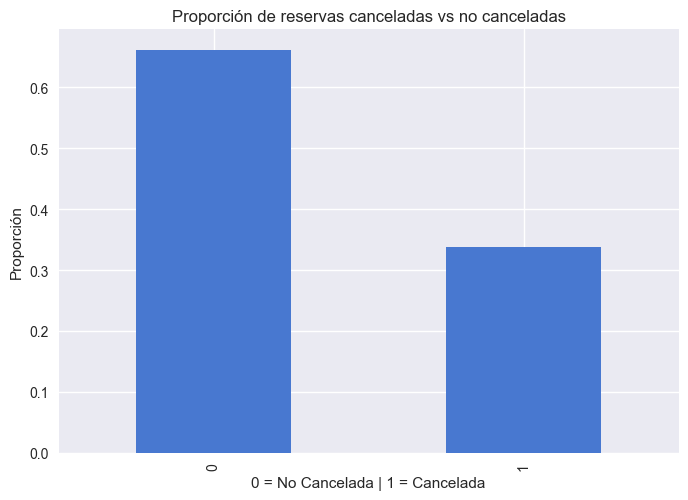

In [62]:
# Distribución de cancelaciones
ax = df["is_canceled"].value_counts(normalize=True).plot(
    kind="bar", title="Proporción de reservas canceladas vs no canceladas"
)
ax.set_xlabel("0 = No Cancelada | 1 = Cancelada")
ax.set_ylabel("Proporción")
plt.show()


Se eligió un gráfico de barras porque permite comparar de manera clara y directa la proporción de reservas canceladas frente a las no canceladas en una variable categórica binaria. El resultado muestra que aproximadamente un tercio de las reservas terminan canceladas, mientras que la mayoría se mantienen efectivas, lo que confirma que la cancelación es un fenómeno frecuente y relevante de analizar.


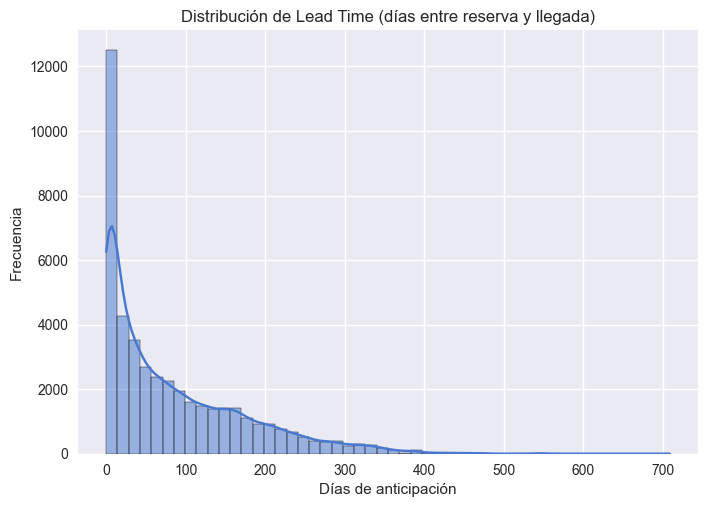

In [63]:
# Distribución de lead_time
sns.histplot(df["lead_time"], bins=50, kde=True)
plt.title("Distribución de Lead Time (días entre reserva y llegada)")
plt.xlabel("Días de anticipación")
plt.ylabel("Frecuencia")
plt.show()

Se eligió un histograma con línea de densidad porque es el tipo de gráfico más adecuado para mostrar la distribución de una variable numérica continua como el tiempo de anticipación entre la reserva y la llegada. El resultado evidencia una distribución altamente sesgada hacia la izquierda, con la mayoría de las reservas realizadas con poca anticipación y un grupo más reducido de casos con tiempos muy largos, incluso de más de 700 días, lo que sugiere la presencia de clientes que reservan con mucha antelación pero que son minoría frente al patrón general.


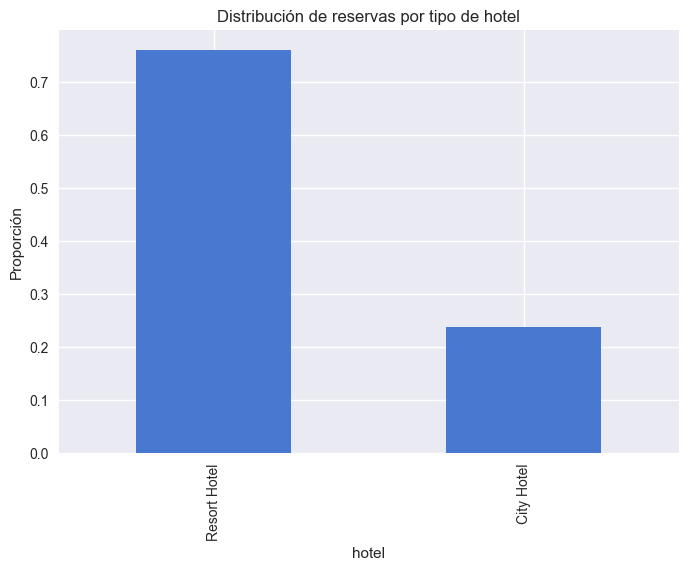

In [65]:
# Distribución por tipo de hotel
df["hotel"].value_counts(normalize=True).plot(
    kind="bar", title="Distribución de reservas por tipo de hotel"
)
plt.ylabel("Proporción")
plt.show()


Se eligió un gráfico de barras porque es el más adecuado para representar la distribución de frecuencias en una variable categórica como el tipo de hotel. El resultado muestra que la mayoría de las reservas corresponden al Resort Hotel, mientras que el City Hotel concentra una proporción menor, lo que indica una mayor preferencia o volumen operativo en hoteles de tipo resort.


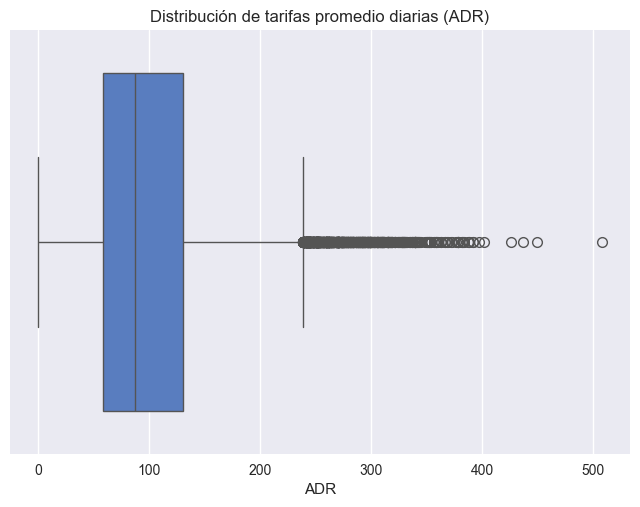

In [67]:
# Distribución de ADR
sns.boxplot(x=df["adr"])
plt.title("Distribución de tarifas promedio diarias (ADR)")
plt.xlabel("ADR")
plt.show()


Se eligió un diagrama de caja (boxplot) porque permite identificar la dispersión y los valores atípicos en una variable numérica continua como la tarifa diaria promedio. El resultado muestra que la mayoría de las tarifas se concentran entre aproximadamente 50 y 150 unidades monetarias, mientras que existen valores extremos que alcanzan más de 500, lo que refleja la presencia de outliers que deben considerarse en el análisis para no distorsionar la interpretación de las medias y tendencias generales.


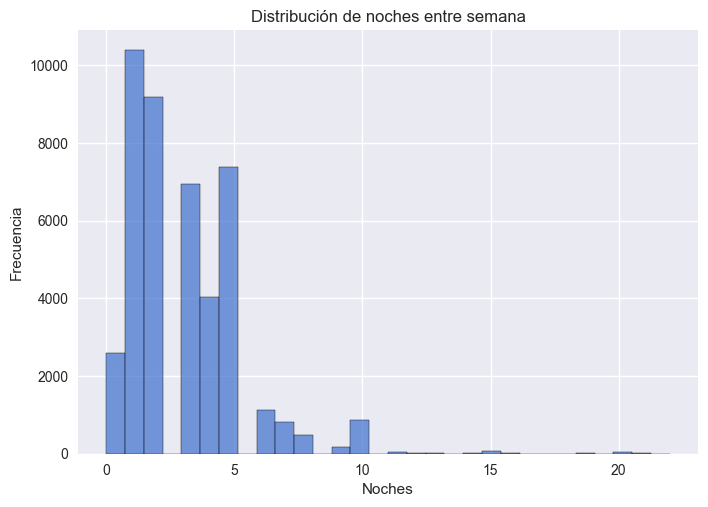

In [68]:
# Distribución de noches entre semana
sns.histplot(df["stays_in_week_nights"], bins=30, kde=False)
plt.title("Distribución de noches entre semana")
plt.xlabel("Noches")
plt.ylabel("Frecuencia")
plt.show()


Se eligió un histograma porque es el gráfico más adecuado para visualizar la frecuencia de una variable numérica discreta como la cantidad de noches entre semana. El resultado muestra que la mayoría de las estancias duran entre una y cinco noches, con un número decreciente de casos a medida que aumenta la duración, y algunos valores poco frecuentes que llegan a superar las veinte noches, lo que evidencia que las estadías largas son excepcionales.


# Estrategia de Análisis

La estrategia de análisis comenzará con el cálculo de estadísticos descriptivos básicos, como medidas de tendencia central, dispersión y frecuencias, con el fin de obtener una visión inicial de los patrones generales en las reservas. Posteriormente, se realizará un análisis exploratorio de datos (EDA) tanto univariado como bivariado para identificar comportamientos de variables individuales y relaciones entre ellas. En este proceso se utilizarán histogramas, gráficos de barras, diagramas de caja y tablas de contingencia, lo que permitirá entender la distribución de los datos, detectar outliers y observar tendencias clave relacionadas con la cancelación de reservas y la duración de las estadías.

Con el fin de dar respuesta al problema de reducir cancelaciones y mejorar la ocupación, se incluirán visualizaciones multivariadas que permitan relacionar la variable de cancelación (is_canceled) con factores como el tipo de hotel, el tiempo de anticipación de la reserva (lead_time), la tarifa promedio diaria (adr), los canales de distribución y el tipo de cliente. Además, se aplicarán pruebas estadísticas como Chi-cuadrado para analizar la dependencia entre cancelación y variables categóricas, así como ANOVA o t-test para comparar medias de lead_time y adr entre reservas canceladas y no canceladas. Estas técnicas se justifican porque permiten identificar patrones significativos y respaldar con evidencia las recomendaciones de negocio orientadas a ajustar políticas de depósito, estrategias de precios y segmentación de clientes para optimizar la ocupación hotelera. Tambien se realizaran analisis sobre las condidciones de reserva, es decir mes del ano, duracion, presencia o no de niños, presencia o no de vehiculos, y alguinos otros factores que influyan de gran manera en el numero de ocupacion.


# Desarrollo de la Estrategia


## EDA bivariado

### **Tasa De Cancelación**

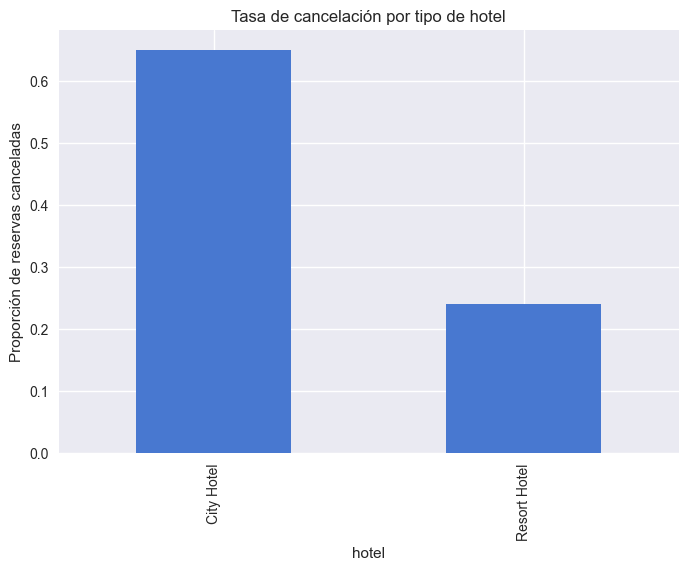

hotel
City Hotel      0.649967
Resort Hotel    0.240354
Name: is_canceled, dtype: float64

In [69]:
# Tasa de cancelación por tipo de hotel
cancel_por_hotel = df.groupby("hotel")["is_canceled"].mean()

ax = cancel_por_hotel.plot(kind="bar", title="Tasa de cancelación por tipo de hotel")
ax.set_ylabel("Proporción de reservas canceladas")
plt.show()

cancel_por_hotel


Se eligió un gráfico de barras porque es la manera más adecuada de comparar tasas de cancelación entre categorías como el tipo de hotel. El resultado muestra que las cancelaciones son mucho más frecuentes en el City Hotel, con una tasa cercana al 65%, mientras que en el Resort Hotel solo alcanzan alrededor del 24%. Esto indica que el tipo de hotel es un factor relevante en el comportamiento de las cancelaciones, lo que sugiere que las estrategias de mitigación deben diferenciarse según la naturaleza del establecimiento.


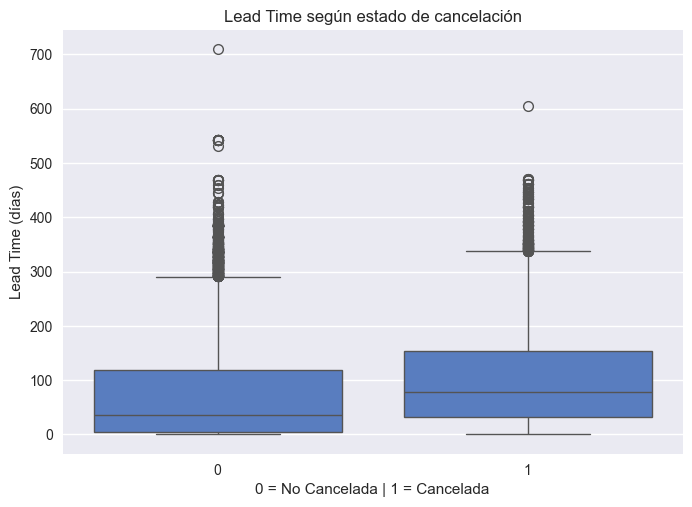

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,29316.0,73.61376,87.603249,0.0,5.0,36.0,119.0,709.0
1,14980.0,103.05267,88.617061,0.0,32.0,79.0,154.0,605.0


In [70]:
# Boxplot de lead_time según si la reserva fue cancelada o no
sns.boxplot(x="is_canceled", y="lead_time", data=df)
plt.title("Lead Time según estado de cancelación")
plt.xlabel("0 = No Cancelada | 1 = Cancelada")
plt.ylabel("Lead Time (días)")
plt.show()

df.groupby("is_canceled")["lead_time"].describe()


Se eligió un boxplot porque permite comparar la distribución de una variable numérica continua, como el lead_time, entre dos grupos definidos por la cancelación de la reserva. El resultado muestra que las reservas canceladas tienden a tener un lead_time mayor que las no canceladas: la mediana de anticipación en las canceladas es de 79 días frente a 36 días en las efectivas. Esto indica que las reservas hechas con mayor anticipación tienen una probabilidad más alta de cancelarse, posiblemente porque en periodos largos aumentan los imprevistos o cambios en los planes de los clientes.


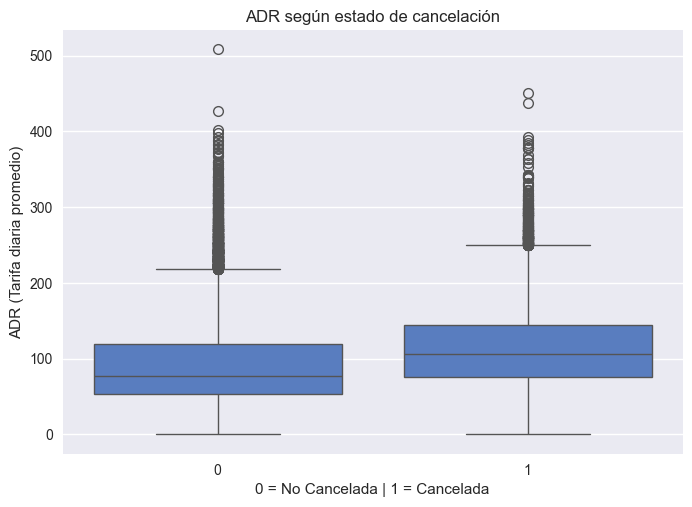

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,29316.0,93.383967,57.268766,0.0,52.85,76.965,119.0,508.0
1,14980.0,115.569597,56.551059,0.0,75.21,106.200,145.0,450.0


In [71]:
# Boxplot de ADR según estado de cancelación
sns.boxplot(x="is_canceled", y="adr", data=df)
plt.title("ADR según estado de cancelación")
plt.xlabel("0 = No Cancelada | 1 = Cancelada")
plt.ylabel("ADR (Tarifa diaria promedio)")
plt.show()

# Valores estadísticos resumidos
df.groupby("is_canceled")["adr"].describe()


Se eligió un boxplot porque facilita la comparación de la dispersión y los valores centrales de una variable numérica como el ADR entre reservas canceladas y no canceladas. El resultado muestra que las reservas canceladas presentan en promedio tarifas más altas, con una mediana de 106 frente a 77 en las no canceladas, y una media de 115 frente a 93. Esto sugiere que los precios más elevados están asociados con una mayor probabilidad de cancelación, lo que puede deberse a la sensibilidad de los clientes al costo o a que las tarifas altas generan más indecisión y cambios en los planes.


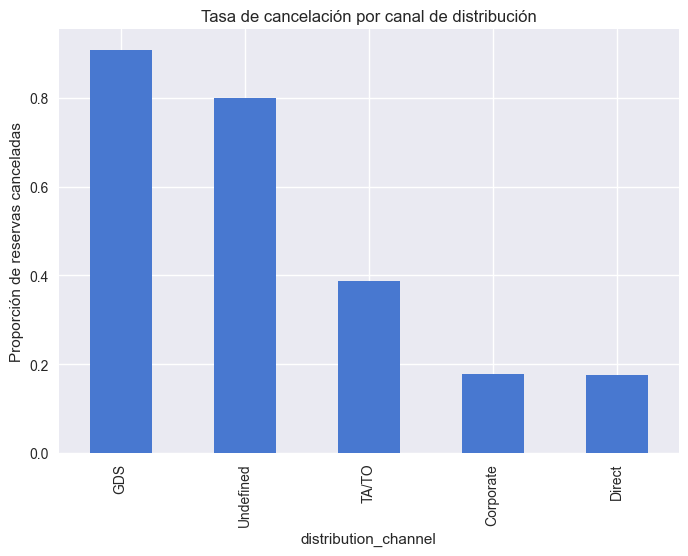

distribution_channel
GDS          0.909091
Undefined    0.800000
TA/TO        0.387099
Corporate    0.178517
Direct       0.175049
Name: is_canceled, dtype: float64

In [72]:
# Tasa de cancelación por canal de distribución
cancel_por_canal = df.groupby("distribution_channel")["is_canceled"].mean().sort_values(ascending=False)

ax = cancel_por_canal.plot(kind="bar", title="Tasa de cancelación por canal de distribución")
ax.set_ylabel("Proporción de reservas canceladas")
plt.show()

cancel_por_canal


Se eligió un gráfico de barras porque permite comparar de manera clara las tasas de cancelación entre categorías nominales como los canales de distribución. El resultado muestra diferencias marcadas: los canales GDS y Undefined presentan tasas extremadamente altas de cancelación, superiores al 80%, mientras que TA/TO se sitúa cerca del 39% y los canales Corporate y Direct muestran tasas mucho más bajas, alrededor del 18%. Esto evidencia que la forma en que se gestiona la reserva influye directamente en la probabilidad de cancelación, lo que sugiere que las estrategias de control deben priorizar la supervisión y gestión de los canales con mayor riesgo.


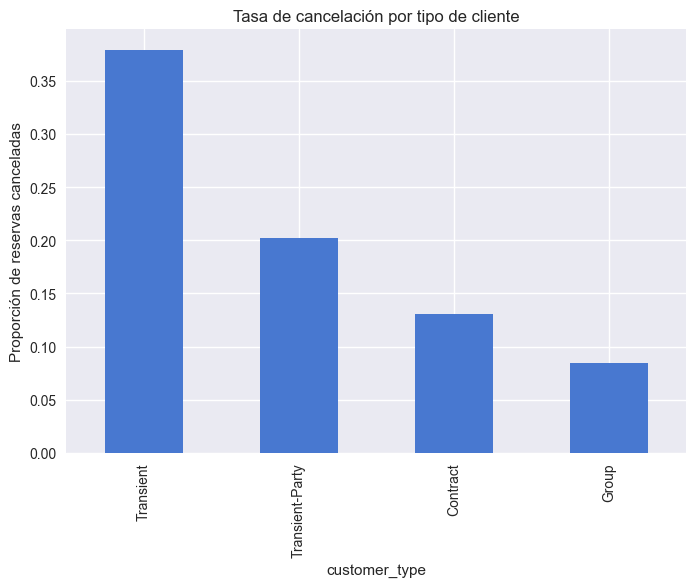

customer_type
Transient          0.379369
Transient-Party    0.202635
Contract           0.130529
Group              0.084507
Name: is_canceled, dtype: float64

In [73]:
# Tasa de cancelación por tipo de cliente
cancel_por_cliente = df.groupby("customer_type")["is_canceled"].mean().sort_values(ascending=False)

ax = cancel_por_cliente.plot(kind="bar", title="Tasa de cancelación por tipo de cliente")
ax.set_ylabel("Proporción de reservas canceladas")
plt.show()

cancel_por_cliente


Se eligió un gráfico de barras porque permite comparar la tasa de cancelación entre categorías nominales como los tipos de cliente. El resultado evidencia que los clientes Transient, que representan reservas individuales no asociadas a contratos ni grupos, presentan la mayor proporción de cancelaciones (cerca del 38%), seguidos por los Transient-Party (20%). En contraste, los clientes Contract y Group muestran tasas considerablemente más bajas, del 13% y 8% respectivamente. Esto indica que las reservas individuales son mucho más volátiles y propensas a cancelarse, mientras que aquellas ligadas a contratos o grupos son más estables, lo que sugiere que la cadena hotelera podría reforzar su estrategia de captación y fidelización en los segmentos Transient para reducir el impacto de las cancelaciones.



In [ ]:
# Promedio de cancelación y ocupación según si viajan con hijos o no
df["con_hijos"] = df["total_kids"] > 0
df.groupby("con_hijos")["is_canceled"].mean(), df.groupby("con_hijos")["is_canceled"].count()


### Conclusión inicial a partir de EDA bivariado:

El análisis bivariado mostró que las cancelaciones son más frecuentes en el City Hotel, en reservas con mayor lead_time, en aquellas con tarifas promedio más altas, en canales de distribución como GDS y Undefined, y en clientes Transient. En contraste, el Resort Hotel, las reservas con menor anticipación o costo, los canales Direct y Corporate, y los clientes Group o Contract presentan tasas mucho más bajas, lo que sugiere perfiles de mayor estabilidad y menor riesgo de cancelación.


### **Ocupación y Demanda**

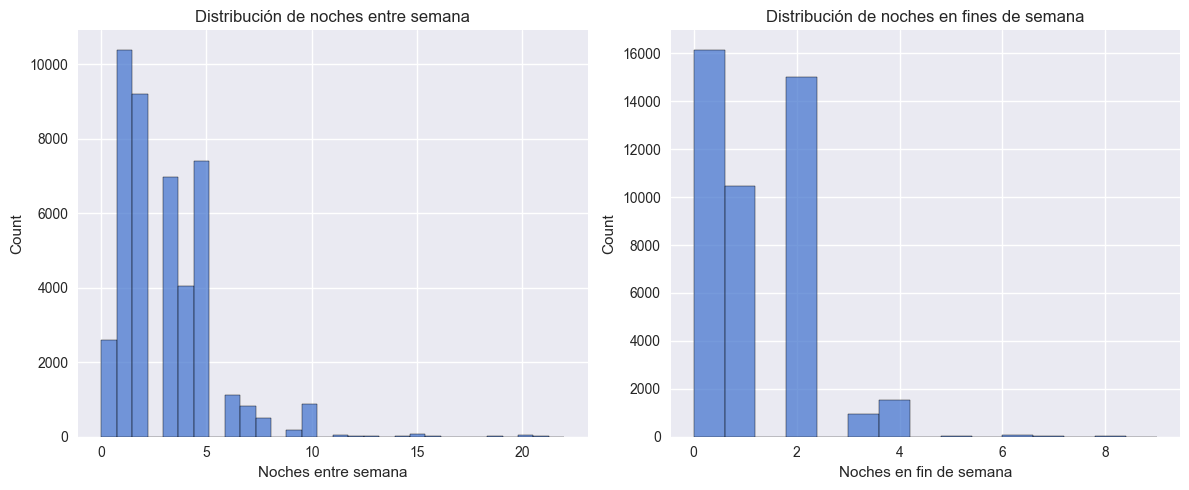

,stays_in_week_nights,stays_in_weekend_nights
hotel,,
City Hotel,2.405520,0.897533
Resort Hotel,3.194917,1.220808


In [77]:
# Distribución de noches entre semana y fines de semana
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df["stays_in_week_nights"], bins=30, kde=False, ax=axes[0])
axes[0].set_title("Distribución de noches entre semana")
axes[0].set_xlabel("Noches entre semana")

sns.histplot(df["stays_in_weekend_nights"], bins=15, kde=False, ax=axes[1])
axes[1].set_title("Distribución de noches en fines de semana")
axes[1].set_xlabel("Noches en fin de semana")

plt.tight_layout()
plt.show()

# Promedio de estadías por tipo de hotel
df.groupby("hotel")[["stays_in_week_nights","stays_in_weekend_nights"]].mean()


El análisis de la duración promedio de las estadías muestra que los huéspedes del Resort Hotel permanecen más noches tanto entre semana como en fines de semana en comparación con los del City Hotel. Esto resulta coherente con la naturaleza de los periodos vacacionales y el mayor tiempo libre asociado al turismo de ocio, que caracteriza a los resorts. En contraste, el City Hotel registra estadías más cortas, lo que sugiere que además del turismo capta un mercado laboral y de negocios, donde los viajes suelen ser de menor duración y más frecuentes en días de semana.


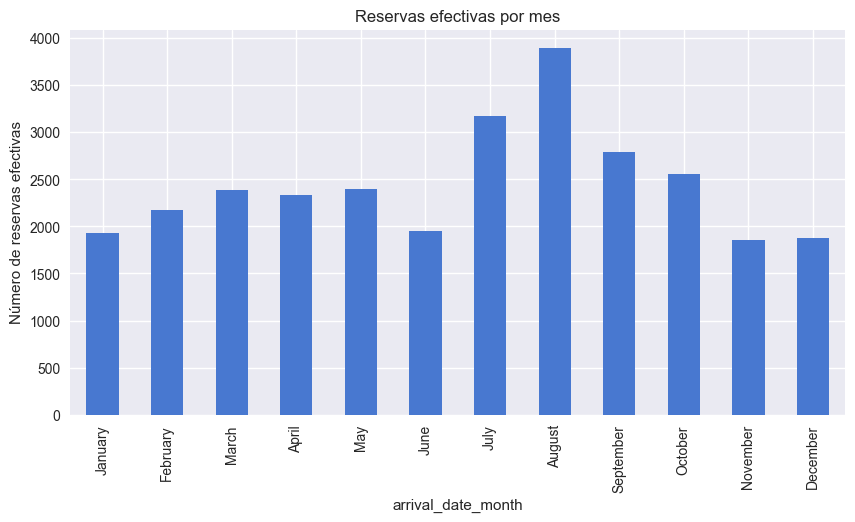

arrival_date_month
January      1931
February     2178
March        2385
April        2337
May          2400
June         1947
July         3168
August       3894
September    2785
October      2559
November     1860
December     1872
Name: count, dtype: int64

In [78]:
# Ocupación por mes (conteo de reservas efectivas)
ocupacion_mes = df[df["is_canceled"] == 0]["arrival_date_month"].value_counts().reindex([
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
])

ocupacion_mes.plot(kind="bar", figsize=(10,5), title="Reservas efectivas por mes")
plt.ylabel("Número de reservas efectivas")
plt.show()

ocupacion_mes


El análisis de la ocupación por mes muestra un claro pico en julio y agosto, lo cual es consistente con los periodos de vacaciones de verano en muchos países, cuando los clientes disponen de más tiempo libre para viajar. En contraste, meses como enero, noviembre y diciembre presentan niveles más bajos de reservas efectivas, lo que sugiere temporadas de menor demanda. Este comportamiento estacional indica que la cadena hotelera podría aprovechar los meses de alta ocupación para mantener tarifas competitivas y, al mismo tiempo, diseñar descuentos o paquetes promocionales en las temporadas bajas con el fin de incentivar la demanda y mejorar la ocupación a lo largo del año.


In [79]:
# Promedio de cancelación y ocupación según si viajan con hijos o no
df["con_hijos"] = df["total_kids"] > 0
df.groupby("con_hijos")["is_canceled"].mean(), df.groupby("con_hijos")["is_canceled"].count()


(con_hijos
 False    0.32628
 True     0.43534
 Name: is_canceled, dtype: float64,
 con_hijos
 False    39463
 True      4833
 Name: is_canceled, dtype: int64)

El análisis muestra que las familias que viajan con hijos presentan una tasa de cancelación más alta (43.5%) en comparación con quienes no los tienen (32.6%). Además, aunque el volumen de reservas familiares es mucho menor frente a las realizadas por adultos sin hijos, este segmento resulta más inestable en términos de confirmación. Esto sugiere que las reservas familiares requieren una estrategia diferenciada, como políticas de mayor flexibilidad o paquetes atractivos para familias, que contribuyan a reducir su propensión a cancelar y a fortalecer su aporte a la ocupación del hotel.


In [80]:
# Cancelación y ocupación según necesidad de parqueadero
df.groupby("required_car_parking_spaces")["is_canceled"].mean()


required_car_parking_spaces
0.0    0.386013
1.0    0.000000
2.0    0.000000
3.0    0.000000
8.0    0.000000
Name: is_canceled, dtype: float64

El análisis de la variable relacionada con la necesidad de espacios de parqueadero muestra que prácticamente todos los clientes que solicitaron parqueadero mantuvieron sus reservas, mientras que las cancelaciones se concentraron en quienes no lo requerían. En otras palabras, los huéspedes que viajan en carro resultan ser más estables y confiables para la ocupación del hotel, lo que sugiere que podrían ser un segmento prioritario para incentivar con beneficios adicionales como descuentos en estacionamiento o paquetes especiales, reforzando así la fidelización de este perfil de cliente.


# **Bloque de analisis y pruebas estadísticas**

### **Chi-cuadrado para variables categóricas**


Antes de aplicar la prueba Chi-cuadrado, es importante señalar que esta técnica es la más adecuada en este contexto porque permite evaluar si existe una dependencia significativa entre dos variables categóricas, en este caso la cancelación de la reserva y atributos como el tipo de hotel, el canal de distribución o el tipo de cliente. Dado que estas variables representan categorías y no valores numéricos continuos, la prueba Chi² es correcta para determinar si las diferencias observadas en las tasas de cancelación entre categorías son estadísticamente relevantes o si podrían deberse al azar. Se espera que, en caso de existir patrones reales de comportamiento, los resultados muestren p-values muy bajos, indicando una relación significativa.


In [74]:
from scipy.stats import chi2_contingency

# Función para chi-cuadrado
def prueba_chi2(col):
    tabla = pd.crosstab(df[col], df["is_canceled"])
    chi2, p, dof, expected = chi2_contingency(tabla)
    return {"Variable": col, "Chi2": chi2, "p-value": p}

# Pruebas para categóricas clave
for col in ["hotel", "distribution_channel", "customer_type"]:
    print(prueba_chi2(col))


{'Variable': 'hotel', 'Chi2': np.float64(6034.733941890481), 'p-value': np.float64(0.0)}
{'Variable': 'distribution_channel', 'Chi2': np.float64(1595.4466288014441), 'p-value': np.float64(0.0)}
{'Variable': 'customer_type', 'Chi2': np.float64(1334.030268836728), 'p-value': np.float64(6.079332049417131e-289)}


Las pruebas Chi-cuadrado confirmaron que las variables categóricas hotel, distribution_channel y customer_type tienen una relación estadísticamente significativa con la cancelación de reservas, con p-values prácticamente nulos. Esto valida los hallazgos del análisis exploratorio, en donde observamos que el City Hotel presenta más cancelaciones que el Resort Hotel, que ciertos canales como GDS concentran tasas más altas y que los clientes Transient son más propensos a cancelar. En consecuencia, estas variables son factores clave a considerar en el diseño de estrategias para reducir cancelaciones.


### **t-test para lead_time (numerica continua)**

Para analizar variables numéricas continuas como el lead_time o el adr en relación con la cancelación, se utiliza la prueba t-test de muestras independientes, que permite comparar si las medias de dos grupos (reservas canceladas y no canceladas) son significativamente diferentes. Esta técnica es adecuada en este contexto porque la variable de cancelación divide a los datos en dos categorías, y el interés está en verificar si la anticipación de la reserva o la tarifa promedio difieren de forma sistemática entre ambos grupos más allá de la variabilidad natural de los datos.


In [75]:
from scipy.stats import ttest_ind

# Separar grupos
lead_time_cancel = df[df["is_canceled"] == 1]["lead_time"]
lead_time_no_cancel = df[df["is_canceled"] == 0]["lead_time"]

# Prueba t-test
t_stat, p_val = ttest_ind(lead_time_cancel, lead_time_no_cancel, equal_var=False)
print("t-test Lead Time -> t:", t_stat, "p-value:", p_val)


t-test Lead Time -> t: 33.20530540698623 p-value: 1.8910333035755933e-237


El t-test aplicado a lead_time arrojó un estadístico t = 33.2 con un p-value prácticamente nulo (≈ 1.89e-237), lo que indica que la diferencia de medias entre reservas canceladas y no canceladas es altamente significativa. En la práctica, esto confirma que las reservas canceladas tienen un tiempo de anticipación mucho mayor que las reservas que se mantienen efectivas, validando el patrón observado en el análisis exploratorio: a mayor lead_time, mayor probabilidad de cancelación.


### **t-test para ADR (numerica continua)**

La prueba t-test de muestras independientes es adecuada para analizar la variable adr porque permite comparar si la media de la tarifa diaria promedio difiere significativamente entre dos grupos definidos por la cancelación de la reserva. En este caso, la variable de cancelación divide los datos en dos categorías (reservas canceladas y no canceladas), lo que convierte al t-test en la herramienta correcta para determinar si las diferencias observadas en el precio promedio entre ambos grupos son producto del azar o reflejan un patrón estadísticamente significativo.


In [76]:
# Separar grupos
adr_cancel = df[df["is_canceled"] == 1]["adr"]
adr_no_cancel = df[df["is_canceled"] == 0]["adr"]

# Prueba t-test
t_stat, p_val = ttest_ind(adr_cancel, adr_no_cancel, equal_var=False)
print("t-test ADR -> t:", t_stat, "p-value:", p_val)


t-test ADR -> t: 38.89459988616629 p-value: 0.0


El t-test aplicado al ADR arrojó un estadístico t = 38.9 con un p-value prácticamente nulo, lo que confirma que la diferencia de medias entre reservas canceladas y no canceladas es estadísticamente significativa. Esto significa que las tarifas promedio diarias son más altas en las reservas que terminan siendo canceladas en comparación con aquellas que se mantienen efectivas. En consecuencia, el precio aparece como un factor determinante en la cancelación de reservas, lo que respalda la necesidad de diseñar políticas de precios o depósitos diferenciados para clientes más sensibles a las tarifas elevadas.


### **Duración de estadía (entre semana y fin de semana)**

Para evaluar si la duración de la estadía difiere entre reservas canceladas y no canceladas se aplicó la prueba t-test de muestras independientes, ya que permite comparar la media de variables numéricas continuas como las noches entre semana y las noches en fin de semana entre dos grupos definidos por la cancelación. Esta prueba es adecuada en este contexto porque ayuda a determinar si las diferencias observadas en la duración de la estadía son estadísticamente significativas o si podrían deberse al azar.


In [81]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(
    df[df["is_canceled"]==1]["stays_in_week_nights"],
    df[df["is_canceled"]==0]["stays_in_week_nights"],
    equal_var=False
)
print("t-test noches entre semana -> t:", t_stat, "p:", p_val)

t_stat, p_val = ttest_ind(
    df[df["is_canceled"]==1]["stays_in_weekend_nights"],
    df[df["is_canceled"]==0]["stays_in_weekend_nights"],
    equal_var=False
)
print("t-test noches fin de semana -> t:", t_stat, "p:", p_val)


t-test noches entre semana -> t: 4.564951655984195 p: 5.015448321056421e-06
t-test noches fin de semana -> t: 5.439880255750299 p: 5.3728200329651526e-08


Los resultados muestran que tanto en las noches entre semana (t = 4.56, p ≈ 5e-06) como en las noches de fin de semana (t = 5.44, p ≈ 5e-08) las diferencias en la duración de la estadía entre reservas canceladas y efectivas son estadísticamente significativas. En la práctica, esto significa que las reservas que terminan cancelándose tienden a tener una duración de estadía distinta (generalmente mayor) en comparación con las que se concretan, lo que refuerza la idea de que los clientes con planes de estancia más largos presentan un mayor riesgo de cancelar sus reservas.


### **Estacionalidad (mes de llegada vs cancelación)**

Para analizar si la probabilidad de cancelación varía según el mes de llegada se utilizó la prueba Chi-cuadrado de independencia, que es apropiada para estudiar la relación entre dos variables categóricas. En este caso, tanto el mes de llegada como el estado de cancelación son variables cualitativas, por lo que la prueba permite determinar si las diferencias observadas en las tasas de cancelación a lo largo del año son estadísticamente significativas o si podrían explicarse por el azar.


In [82]:
tabla_mes = pd.crosstab(df["arrival_date_month"], df["is_canceled"])
chi2, p, dof, expected = chi2_contingency(tabla_mes)
print("Chi² mes vs cancelación ->", chi2, "p-value:", p)


Chi² mes vs cancelación -> 1192.8495383141312 p-value: 5.629129463743612e-249


El resultado de la prueba arrojó un estadístico Chi² = 1192.85 con un p-value prácticamente nulo (≈ 5.6e-249), lo que confirma que la relación entre el mes de llegada y la cancelación de la reserva es altamente significativa. En términos prácticos, esto significa que la probabilidad de que una reserva sea cancelada depende fuertemente de la estacionalidad, lo cual es coherente con los patrones vacacionales y de demanda turística: durante los meses de mayor volumen de viajes la ocupación es más estable, mientras que en temporadas bajas la propensión a cancelar se incrementa.


# **Extracción de Insights**

Del análisis realizado se extraen varios insights clave sobre el comportamiento de las cancelaciones y la ocupación hotelera. En primer lugar, se observó que el City Hotel presenta una tasa de cancelación significativamente más alta (65%) frente al Resort Hotel (24%), lo que sugiere que el tipo de establecimiento influye directamente en la estabilidad de las reservas. Asimismo, las reservas con mayor anticipación (lead_time) mostraron una clara tendencia a cancelarse, confirmada por la prueba t-test, lo que indica que a mayor tiempo entre la reserva y la llegada aumenta el riesgo de cancelación. También se encontró que las reservas con tarifas promedio diarias (ADR) más altas presentan mayor probabilidad de ser canceladas, lo que refleja la sensibilidad de los clientes al precio y el impacto del costo en la decisión final. En cuanto a los canales de distribución, se identificó que GDS y Undefined concentran las tasas de cancelación más elevadas, superiores al 80%, mientras que los canales Direct y Corporate muestran mayor estabilidad, con tasas mucho más bajas. Finalmente, el tipo de cliente también es un factor determinante: los clientes Transient concentran la mayoría de las cancelaciones (38%), mientras que los clientes asociados a contratos o grupos presentan tasas considerablemente más bajas, lo que sugiere que estos segmentos son más confiables y generan ocupación más estable.  

En cuanto a la ocupación, se encontró que el Resort Hotel concentra estadías más largas, tanto entre semana como en fines de semana, lo que es coherente con su orientación a periodos vacacionales, mientras que el City Hotel muestra estadías más cortas asociadas a un mercado laboral o de negocios. Además, el análisis mensual reflejó un fuerte componente estacional: los meses de verano, como julio y agosto, concentran mayor volumen de reservas efectivas, mientras que enero y noviembre presentan menor demanda, lo que sugiere que ofrecer descuentos o paquetes especiales en temporada baja podría ayudar a incentivar la ocupación. Respecto a los perfiles de clientes, se observó que quienes viajan con hijos cancelan más que aquellos que no lo hacen, lo que indica la necesidad de diseñar políticas específicas para familias, mientras que los huéspedes que requieren parqueadero mostraron una mayor estabilidad en sus reservas, lo que los convierte en un segmento atractivo para fidelizar mediante beneficios adicionales. Estos hallazgos complementan la visión sobre cancelaciones y aportan elementos clave para diseñar estrategias que optimicen tanto la estabilidad de la demanda como la ocupación hotelera.



# **Genración de Resultados**


Para la exposición de resultados y su respectiva sustentacion se adjunta un infrome en formato pdf dentro del repositorio donde se entregara el notebook y todo lo relacionado.